In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib as plt

In [28]:
import pandas as pd
df = pd.read_csv('/Users/elliott/Documents/Personal_Projects/calls_weather_week.csv')

In [29]:
df.head()

,Date,Maximum,Minimum,Average,Precipitation,Weekday,weekday_num,Dispatched_calls
0,2016-09-01,68,58,63.0,0.0,Thursday,3,347
1,2016-09-02,71,55,63.0,0.0,Friday,4,401
2,2016-09-03,66,57,61.5,0.0,Saturday,5,341
3,2016-09-04,67,56,61.5,0.0,Sunday,6,317
4,2016-09-05,72,53,62.5,0.0,Monday,0,328


Normalize code with Max-min

In [30]:
lst = ['Maximum','Minimum', 'Average','Precipitation','weekday_num']

In [31]:
for x in lst:
     df[str(x)]=(df[str(x)]-df[str(x)].min())/(df[str(x)].max()-df[str(x)].min())

In [32]:
df.head()

,Date,Maximum,Minimum,Average,Precipitation,Weekday,weekday_num,Dispatched_calls
0,2016-09-01,0.345455,0.611111,0.438202,0.0,Thursday,0.500000,347
1,2016-09-02,0.400000,0.527778,0.438202,0.0,Friday,0.666667,401
2,2016-09-03,0.309091,0.583333,0.404494,0.0,Saturday,0.833333,341
3,2016-09-04,0.327273,0.555556,0.404494,0.0,Sunday,1.000000,317
4,2016-09-05,0.418182,0.472222,0.426966,0.0,Monday,0.000000,328


Set up for simple linear regression
    - Predictor variable = x
    - Target variable    = y
    - lm.fit(x,y)
    

In [90]:
x = df['Maximum']
y = df['Dispatched_calls']

In [91]:
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)


In [92]:
x.shape

(1125, 1)

In [93]:
y.shape

(1125, 1)

In [94]:
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
yhat=lm.predict(x)

In [96]:
from sklearn.metrics import mean_squared_error

Calculate R^2 value. 1 is perfect fit. 0 means our line is not a great fit for the data points, and is no better than just averaging the data points. 

In [97]:
lm.score(x, y)

0.08011033533536349

create a regression plot using seaborn

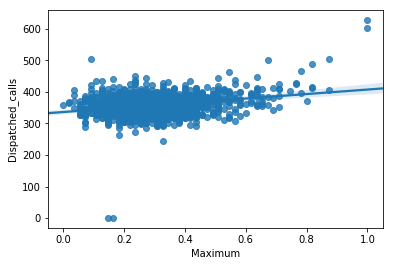

In [100]:
import seaborn as sns
sns.regplot(x='Maximum', y= 'Dispatched_calls',data=df)

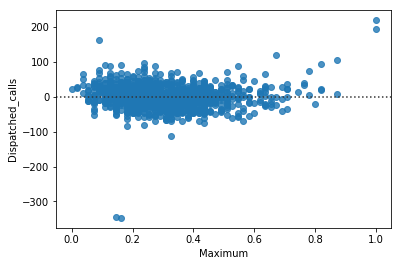

In [101]:
sns.residplot(df['Maximum'], df['Dispatched_calls'])

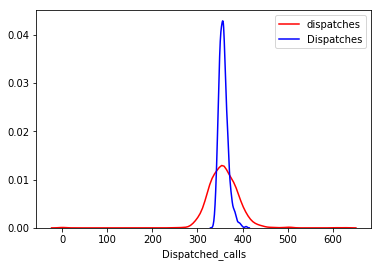

In [189]:
ax1 = sns.distplot(df['Dispatched_calls'],hist=False,color='r', label="dispatches")
sns.distplot(yhat, hist=False, color='b', label='Dispatches', ax=ax1)